In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# === CLASS ENCODING ===
# NO_ACTION = 0
# SHIELD = 1
# GRENADE = 2
# RELOAD = 3
# ENDING = 4

# === RAW DATA ===
# AccX
# AccY
# AccZ
# GyroX 
# GyroY
# GyroZ

In [3]:
DATA_DIR = 'data'
RAW = DATA_DIR + '/raw'

In [4]:
def mean(data):
    return np.mean(data)

def std(data):
    return np.std(data)

def iqr(data):
    '''
    calculate interquartile range
    '''
    q3, q1 = np.percentile(data, [75 ,25])
    return q3 - q1 

def mad(data, axis=None):
    '''
    calculate mean absolute deviation
    '''
    return np.mean(np.absolute(data - np.mean(data, axis)), axis)

In [5]:
sample_data = [[] for _ in range(6)]
    
with open(f'{RAW}/s1r1.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        data_point = map(float, line.split(','))
        for i, n in enumerate(data_point):
            sample_data[i].append(n)

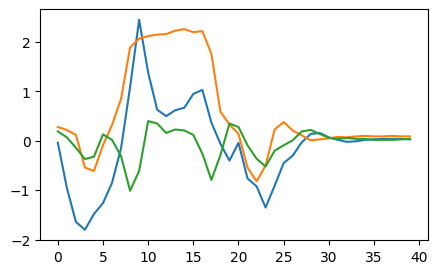

In [6]:
plt.figure(figsize=(5,3))
plt.plot(sample_data[0])
plt.plot(sample_data[1])
plt.plot(sample_data[2])
plt.show()

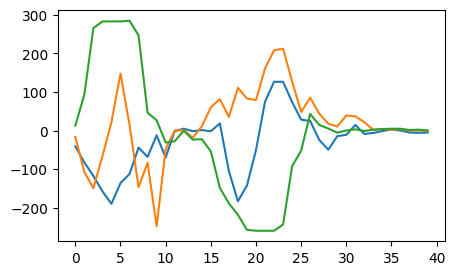

In [7]:
plt.figure(figsize=(5,3))
plt.plot(sample_data[3])
plt.plot(sample_data[4])
plt.plot(sample_data[5])
plt.show()

In [8]:
action_mapping = {'n': 0, 's':1, 'g':1, 'r':1, 'e':1}
data = []

for filename in os.listdir(RAW):
    if filename[-3:] == 'txt':
        single_action = [[] for _ in range(6)]
        single_action_tranform = []
        action = action_mapping[filename[0]]

        with open(f'{RAW}/{filename}', 'r') as f:
            lines = f.readlines()
            for line in lines:
                data_point = map(float, line.split(','))
                for i, n in enumerate(data_point):
                    single_action[i].append(n)

        for s in single_action:
            single_action_tranform.append(max(s))
            single_action_tranform.append(min(s))
            single_action_tranform.append(mean(s))
            single_action_tranform.append(std(s))
#             single_action_tranform.append(iqr(s))    
            single_action_tranform.append(mad(s))
        single_action_tranform.append(action)
        data.append(single_action_tranform)

In [9]:
df = pd.DataFrame.from_records(data)
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.36,-0.55,-0.05600,0.185119,0.130600,0.64,-0.48,0.25375,0.257320,0.203813,...,-245.64,7.13225,80.368929,56.665587,121.83,-95.63,13.76900,42.400523,33.102700,1
1,0.27,-0.87,-0.14800,0.254649,0.185700,1.52,-0.50,0.44200,0.521743,0.449100,...,-260.38,4.00625,112.241522,71.131312,190.10,-260.28,-13.01025,105.625801,70.917362,1
2,0.58,-0.20,0.04375,0.136431,0.088750,0.80,-0.90,0.05575,0.373643,0.238813,...,-222.51,16.65000,85.345034,62.295500,70.40,-71.89,-1.68325,35.277483,27.462912,1
3,0.33,-0.53,-0.14900,0.146404,0.105850,0.72,-0.16,0.15075,0.171528,0.120325,...,-190.27,1.14000,76.686632,59.485000,89.31,-108.33,-7.60725,50.283531,42.688887,0
4,1.99,-1.10,-0.00425,0.736060,0.519400,1.12,-1.01,0.34200,0.550464,0.461700,...,-272.68,-12.02825,127.007156,96.549725,284.22,-261.25,-0.14225,162.534604,122.720925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,0.58,-1.83,0.03075,0.409270,0.268912,1.11,-0.98,0.05775,0.474170,0.302812,...,-269.94,-11.06225,141.149716,99.073588,282.64,-262.79,-2.56400,122.268546,79.871500,1
1606,1.97,-1.85,-0.01875,0.703176,0.453937,2.01,-0.81,0.18175,0.666963,0.439800,...,-175.70,8.61775,93.175881,65.056800,284.73,-260.74,-6.90700,146.795926,95.748100,1
1607,0.74,-0.73,0.07900,0.304744,0.218100,1.61,-0.31,0.50825,0.564185,0.513900,...,-269.40,13.48575,113.446793,75.802188,279.65,-262.44,-19.95625,95.815667,59.434938,1
1608,2.01,-1.22,0.04900,0.649511,0.414150,1.90,-0.53,0.36300,0.625541,0.506350,...,-271.02,-5.08225,96.648737,63.004763,280.52,-265.08,-9.47625,140.077046,86.835625,1


In [10]:
df.rename(columns={30:'action'}, inplace=True)

## Train model

In [11]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [12]:
NUM_FEATURES = 30

In [13]:
X = df[[x for x in range(NUM_FEATURES)]]
y = df['action']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.85, random_state=42, shuffle=True
)

X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [15]:
train_df = X_train.copy()
train_df['action'] = y_train
test_df = X_test.copy()
test_df['action'] = y_test

# train_df.to_csv(f'{DATA_DIR}/train.csv', index=False)
# test_df.to_csv(f'{DATA_DIR}/test.csv', index=False)

In [16]:
len(y_train), len(y_test)

(957, 169)

In [17]:
input_size = NUM_FEATURES
hidden_size = 10
num_classes = 2
num_epochs = 400
batch_size = 20
learning_rate = 0.01
device = torch.device('cpu')

In [18]:
class ImuDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __getitem__(self, index):
        return torch.Tensor(self.X.iloc[index].astype(float)), self.y[index]
    
    def __len__(self):
        return len(self.X)

In [19]:
train_dataset = ImuDataset(X_train, y_train)
test_dataset = ImuDataset(X_test, y_test)

train_loader = DataLoader(
    dataset=train_dataset, 
    batch_size=batch_size, 
    shuffle=True
)
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

In [20]:
class FCN(nn.Module):
    '''
    Fully connected network (MLP) with one hidden layer using ReLU activation function
    '''
    def __init__(self, input_size, hidden_size, num_classes):
        super(FCN, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out) 
        return out

In [21]:
model = FCN(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

def test_conf_matrix(benchmark_loader, is_test_set=False):
    y_pred = []
    y_true = []
    
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        for data, labels in benchmark_loader:
            labels = labels.to(device)
            y_true.extend(labels)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            y_pred.extend(predicted)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()

        acc = 100.0 * n_correct / n_samples
        if is_test_set:
            print(f'Accuracy on test set: {acc:.4f}%')
        else:
            print(f'Accuracy on train set: {acc:.4f}%')
        
        cf_mat = confusion_matrix(y_true, y_pred)
        cm_df = pd.DataFrame(cf_mat, index=[i for i in range(num_classes)], columns=[i for i in range(num_classes)])
        plt.figure(figsize=(4,3))
        sb.heatmap(cm_df, annot=True)

Before training
Accuracy on train set: 25.6008%
Accuracy on test set: 21.8935%


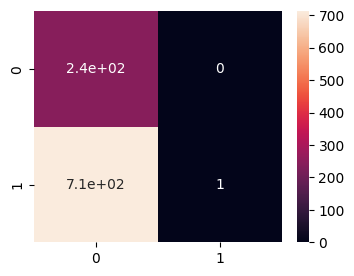

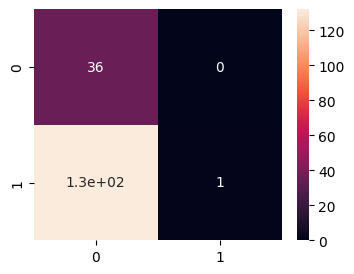

In [23]:
print('Before training')
test_conf_matrix(train_loader)
test_conf_matrix(test_loader, True)

In [24]:
losses = [] # to record loss over training time

for epoch in range(num_epochs):
    for i, (data, label) in enumerate(train_loader):
        label = label.to(device)
        output = model(data)
        loss = criterion(output, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    
    scheduler.step()

    if epoch % 200  == 0:
        print(f'Epoch {epoch+1}/{num_epochs}: loss = {loss.item():.4f}', end='; ')
        print(f"learning rate = {optimizer.param_groups[0]['lr']}")

Epoch 1/400: loss = 1.4927; learning rate = 0.01
Epoch 201/400: loss = 0.0694; learning rate = 0.0025


After training
Accuracy on train set: 98.1191%
Accuracy on test set: 98.8166%


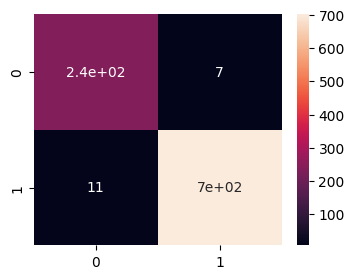

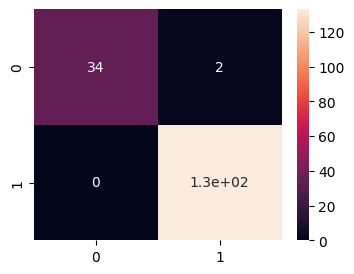

In [25]:
print('After training')
test_conf_matrix(train_loader)
test_conf_matrix(test_loader, True)

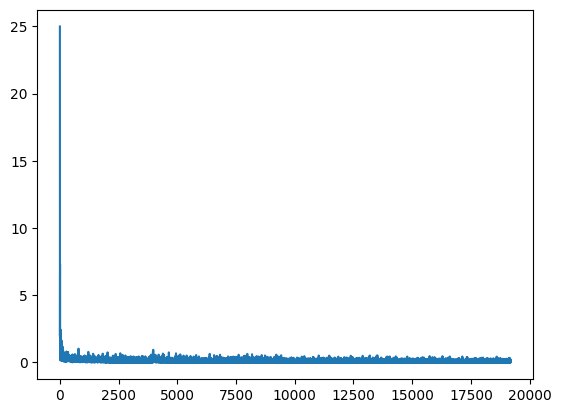

In [26]:
plt.plot(losses)

## Visualization

In [12]:
na_df = df[df['action'] == 0]
action_df = df[df['action'] == 1]

In [21]:
action_mapping = {'n': 0, 's':1, 'g':1, 'r':1, 'e':1}
na_gyrosq = []
a_gyrosq = []

for filename in os.listdir(RAW):
    if filename[-3:] == 'txt':
        single_action = [[] for _ in range(6)]
        single_action_tranform = []
        action = action_mapping[filename[0]]
        
        sq = 0
        
        with open(f'{RAW}/{filename}', 'r') as f:
            lines = f.readlines()
            for line in lines:
                data_point = list(map(float, line.split(',')))
                sq += (data_point[-1]**2 + data_point[-2]**2 + data_point[-3]**2)
#                 sq += sum([x**4 for x in data_point])
            if action == 1:
                a_gyrosq.append((sq**0.5)/1e4)
            else:
                na_gyrosq.append((sq**0.5)/1e4)

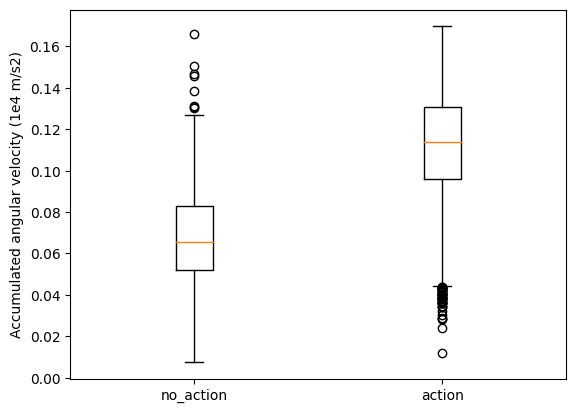

In [24]:
gyrosq = {'no_action': na_gyrosq, 'action': a_gyrosq}

fig, ax = plt.subplots()
plt.ylabel('Accumulated angular velocity (1e4 m/s2)')
ax.boxplot(gyrosq.values())
ax.set_xticklabels(gyrosq.keys())
plt.savefig('img/no_action.png', bbox_inches='tight')

## Extract weight

In [30]:
for weight in model.state_dict():
    print(weight)

l1.weight
l1.bias
l2.weight
l2.bias


In [31]:
l1_weight = model.state_dict()['l1.weight'].tolist()
l2_weight = model.state_dict()['l2.weight'].tolist()
l1_bias = model.state_dict()['l1.bias'].tolist()
l2_bias = model.state_dict()['l2.bias'].tolist()

In [39]:
print(l1_bias)

[0.13907694816589355, -0.0030833121854811907, -0.04062708094716072, 0.7313218712806702, 1.5363866090774536, 0.47265589237213135, -0.13381190598011017, -0.10589716583490372, 0.08582720905542374, 0.06145358458161354]


In [34]:
l2_bias

[1.4098623991012573, -1.3333971500396729]

In [41]:
for row in l2_weight:
    print(row, end=',\n')

[-0.012709975242614746, 0.02395152673125267, 0.22017285227775574, 0.017489245161414146, 0.16941791772842407, -0.22186632454395294, 0.04313218221068382, 0.23397812247276306, 0.20785969495773315, -0.06630640476942062],
[0.02120683342218399, 0.0715719684958458, -0.1725044548511505, -0.09411125630140305, -0.20831690728664398, 0.4439782500267029, 0.06662830710411072, 0.1738119125366211, 0.31218889355659485, -0.04936651512980461],


In [38]:
for row in l1_weight:
    print(row, end=',\n')

[-0.1198243573307991, 0.04684671759605408, 0.022814538329839706, 0.01159191969782114, -0.06596624851226807, 0.07865540683269501, 0.05464990809559822, 0.13459977507591248, -0.06858129799365997, -0.0001200079350383021, -0.17292921245098114, -0.052942246198654175, -0.04928956925868988, -0.16438989341259003, -0.04390879347920418, -0.13073861598968506, 0.27751320600509644, 0.09520226716995239, -0.1823963224887848, -0.18159176409244537, -0.18959924578666687, -0.0013682409189641476, 0.14871098101139069, 0.049952518194913864, -0.23134396970272064, -0.22834450006484985, 0.26141196489334106, -0.11341636627912521, -0.023215629160404205, -0.2548285722732544],
[-0.1213923767209053, 0.1729421466588974, 0.19867883622646332, 0.1697530895471573, 0.05387910082936287, 0.12127263844013214, 0.07520749419927597, 0.07542281597852707, -0.013194659724831581, -0.004566327203065157, -0.13253700733184814, -0.08075561374425888, 0.07336974143981934, -0.05135684832930565, -0.0727161169052124, -0.02222581021487713, 0